# Heart Disease Recognition

## Importing the Dependencies

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data Collection and Data Understanding

In [41]:
data= pd.read_csv('D:\Coding\Machine learning\Projects on ML\Heart Disease Prediction\Dataset.csv')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [43]:
# to print first five rows
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [44]:
# to print last five rows
data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [45]:
data.shape

(1025, 14)

In [46]:
#statistical measures about the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [47]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [48]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

### Features and Target Seperation

In [49]:
X=data.drop(columns='target', axis=1)

Y=data['target']

In [50]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [51]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


## Exploratory Data Analysis (EDA)

#### Distribution of samples based on heart diesease

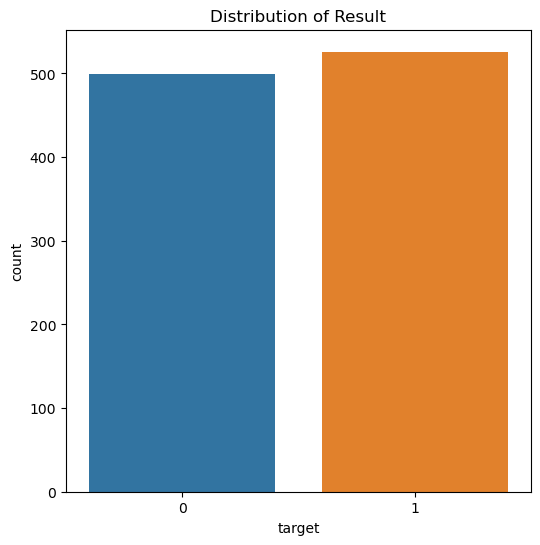

In [98]:
plt.figure(figsize=(6,6))

sns.countplot(x=data['target'])

plt.title('Distribution of Result')

plt.show()

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='cp', ylabel='age'>,
        <Axes: xlabel='trestbps', ylabel='age'>,
        <Axes: xlabel='chol', ylabel='age'>,
        <Axes: xlabel='fbs', ylabel='age'>,
        <Axes: xlabel='restecg', ylabel='age'>,
        <Axes: xlabel='thalach', ylabel='age'>,
        <Axes: xlabel='exang', ylabel='age'>,
        <Axes: xlabel='oldpeak', ylabel='age'>,
        <Axes: xlabel='slope', ylabel='age'>,
        <Axes: xlabel='ca', ylabel='age'>,
        <Axes: xlabel='thal', ylabel='age'>,
        <Axes: xlabel='target', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='cp', ylabel='sex'>,
        <Axes: xlabel='trestbps', ylabel='sex'>,
        <Axes: xlabel='chol', ylabel='sex'>,
        <Axes: xlabel='fbs', ylabel='sex'>,
        <Axes: xlabel='restecg', ylabel='sex'>,
        <Axes: xlabel='thalach', ylabel='s

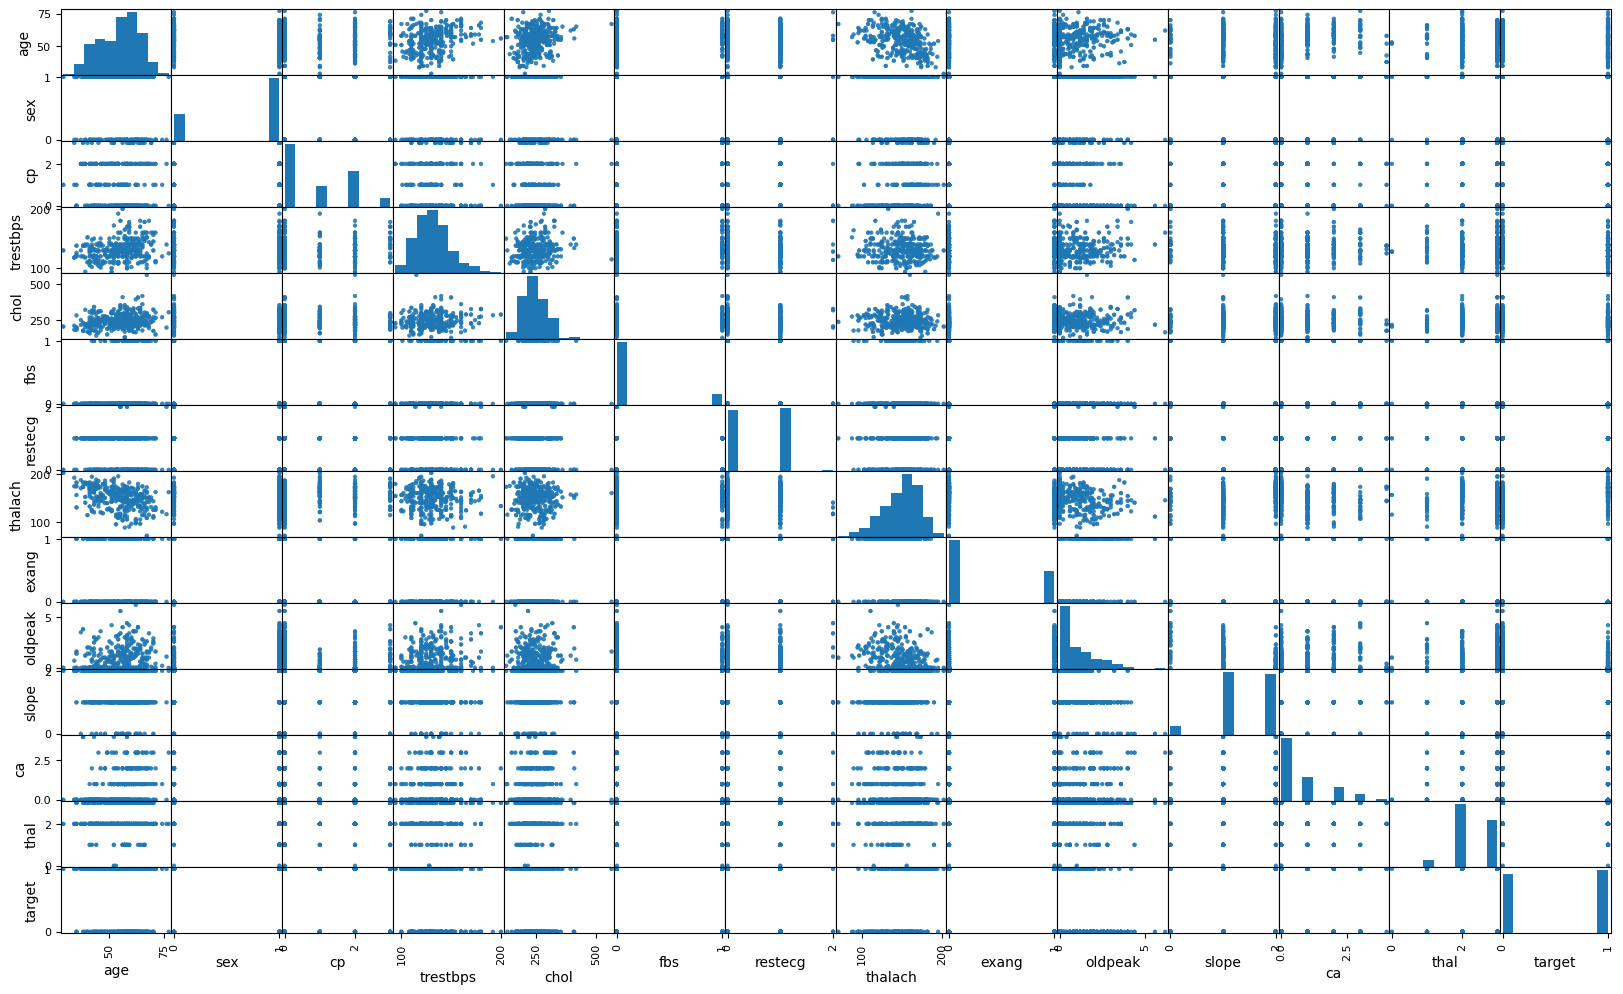

In [99]:
scatter_matrix(data, figsize=(20,12))

C:\Users\janga\AppData\Local\Temp\ipykernel_20688\2064304092.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i], hist=True, kde=True, bins =50, color='blue', hist_kws={'edgecolor':'black'})
C:\Users\janga\AppData\Local\Temp\ipykernel_20688\2064304092.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


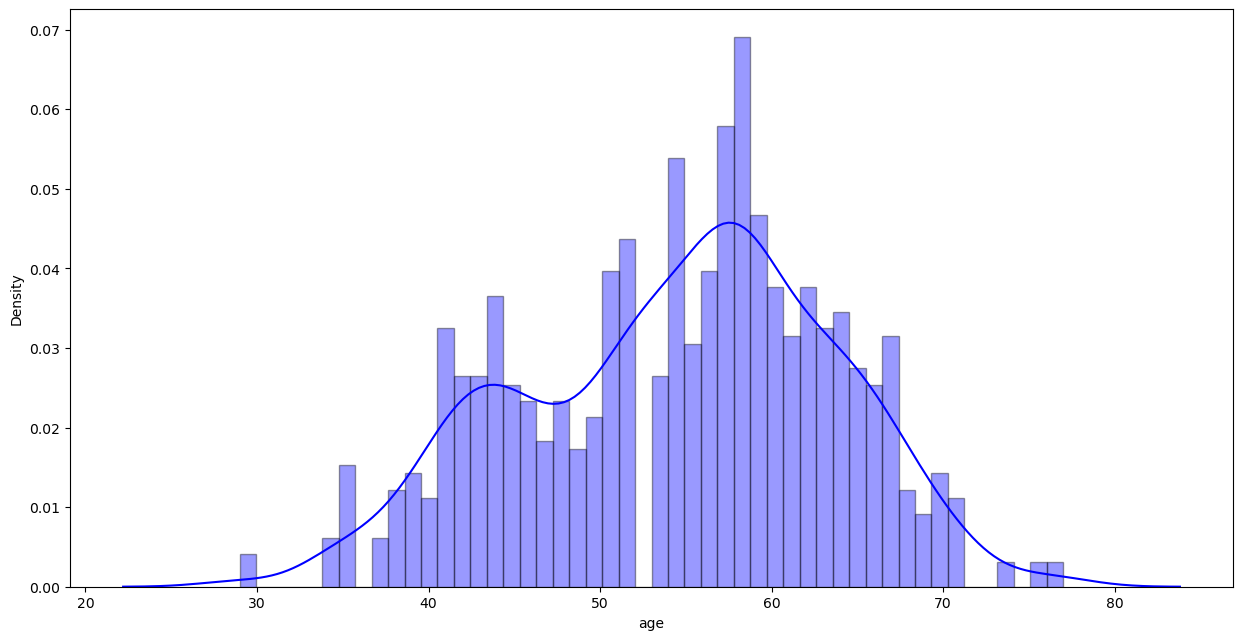

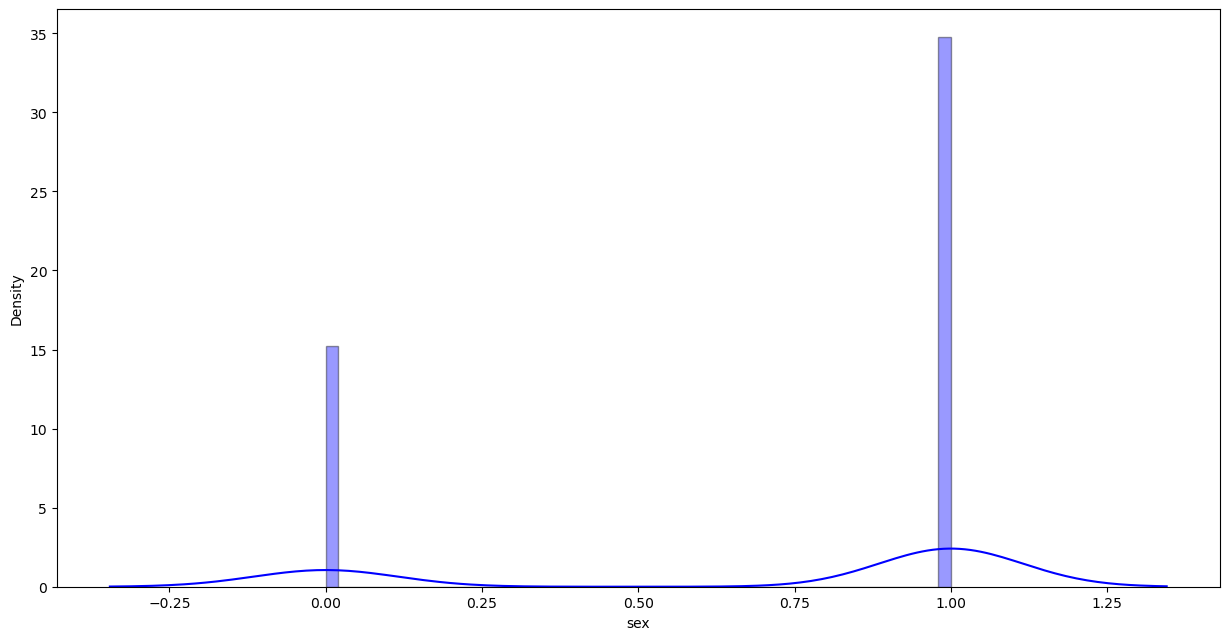

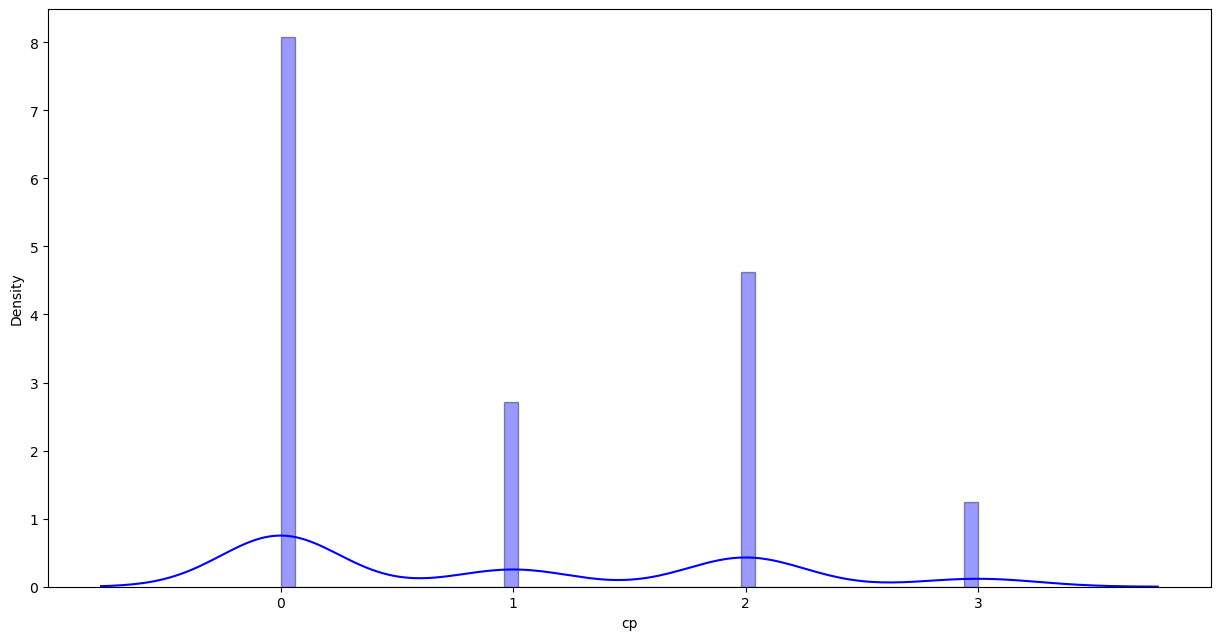

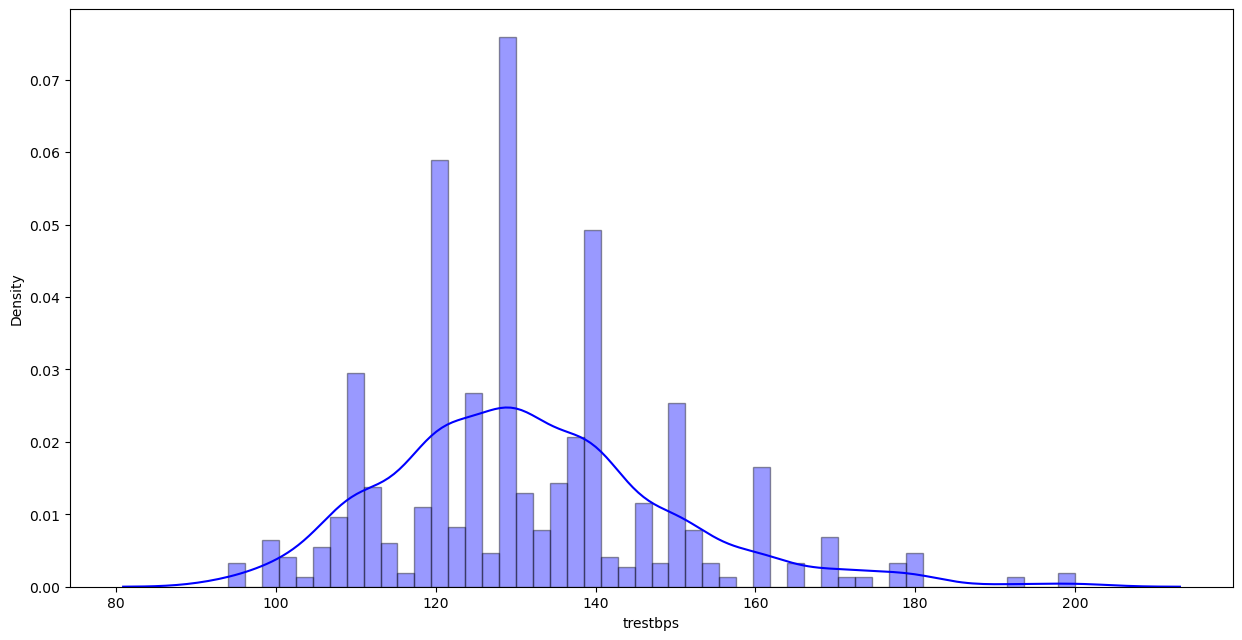

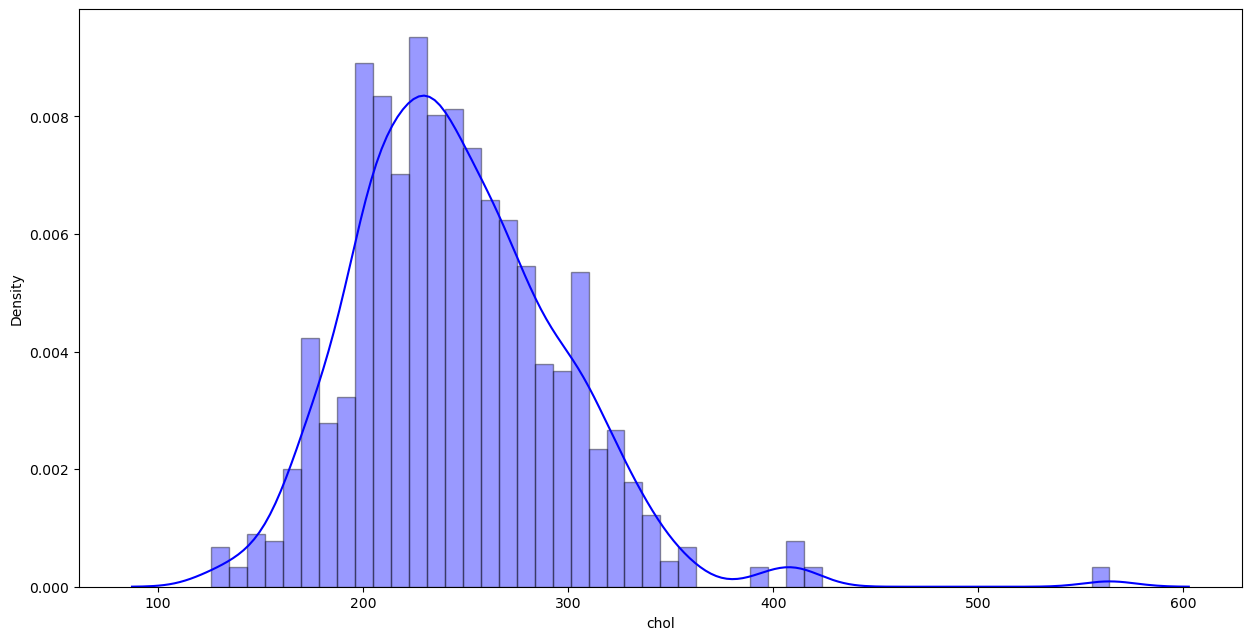

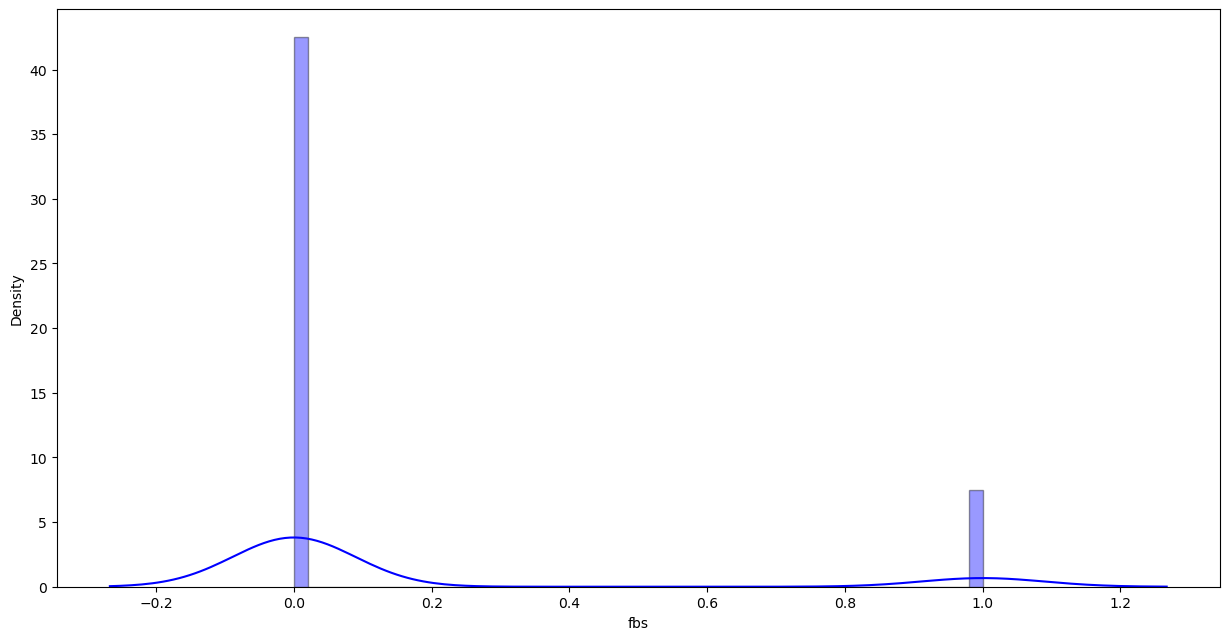

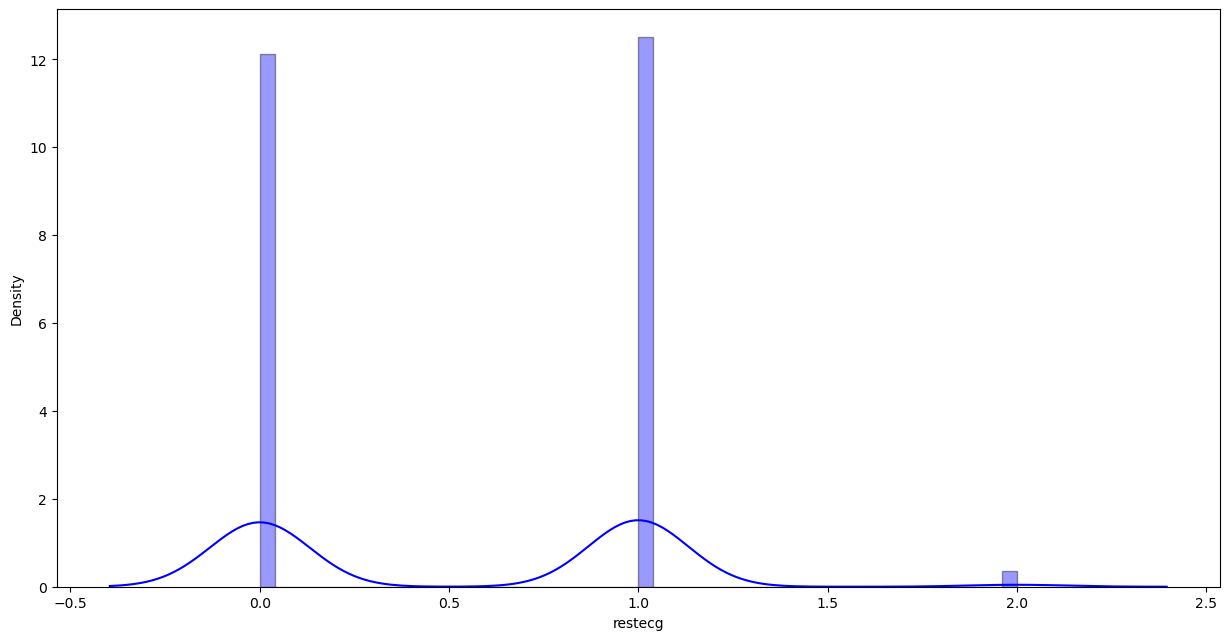

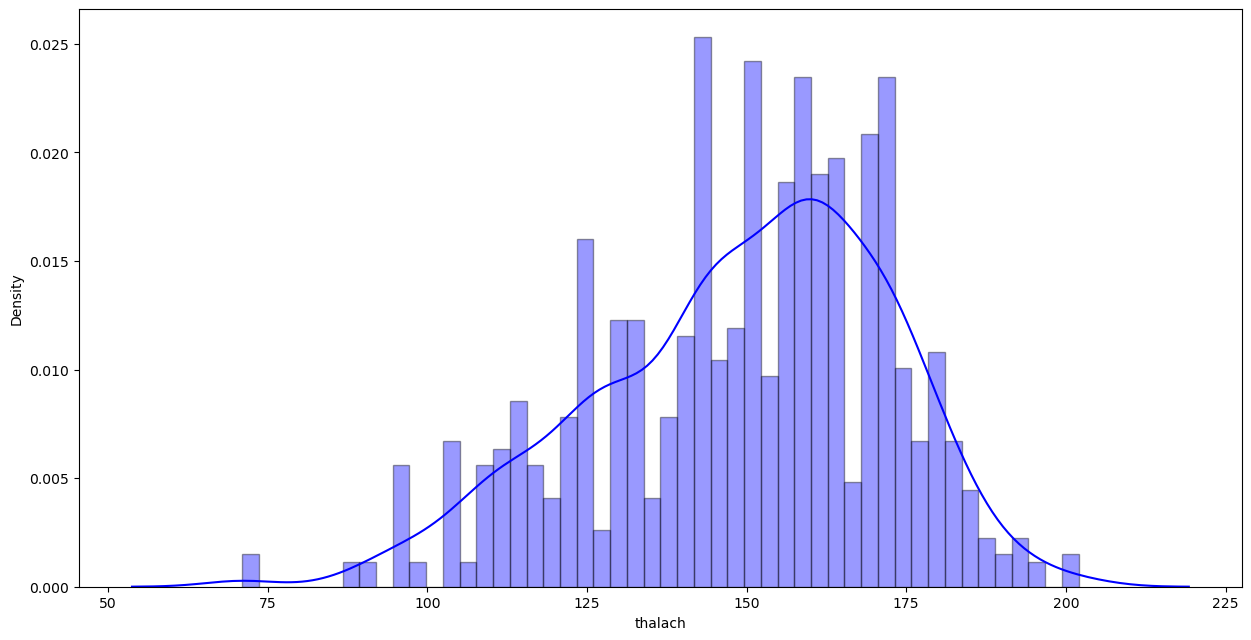

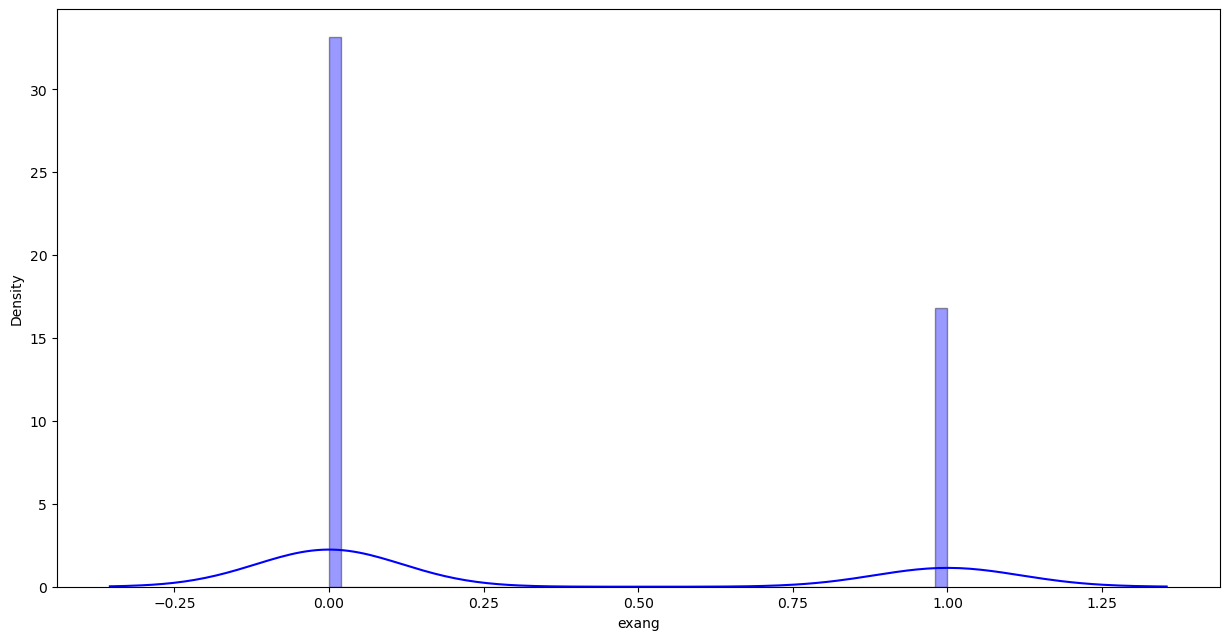

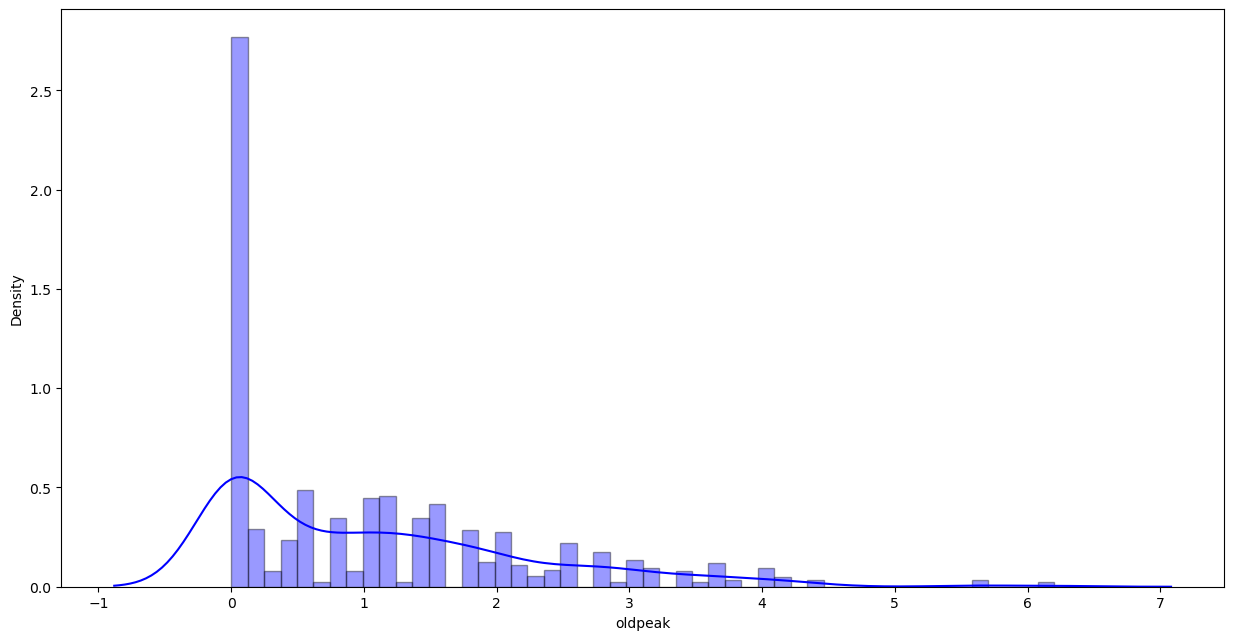

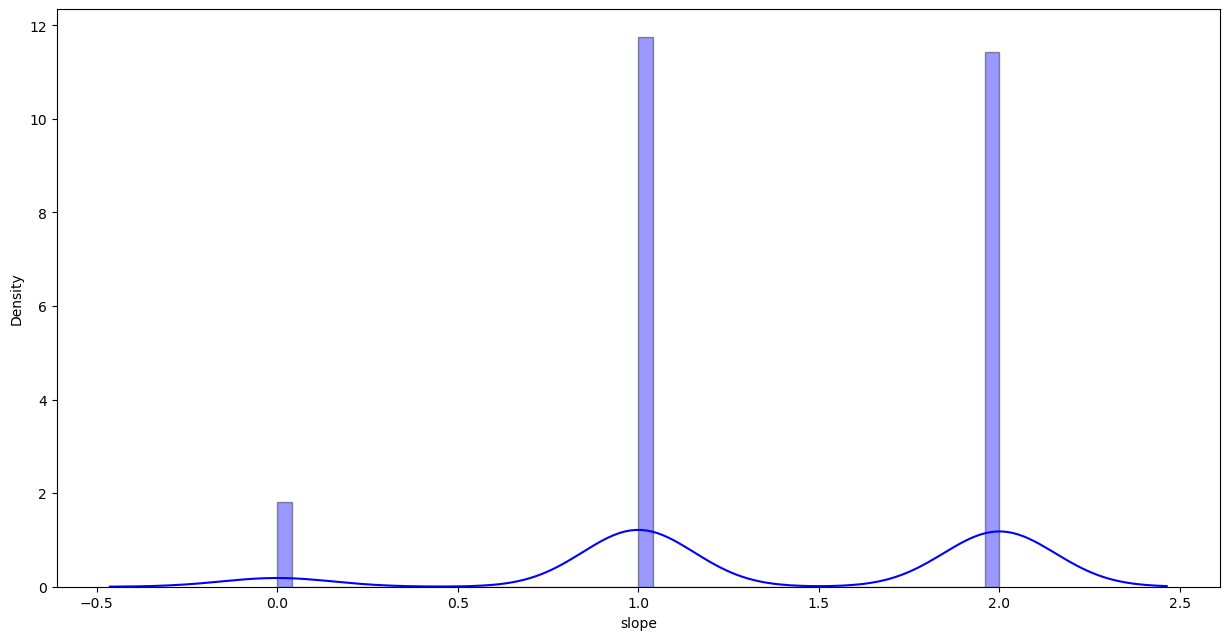

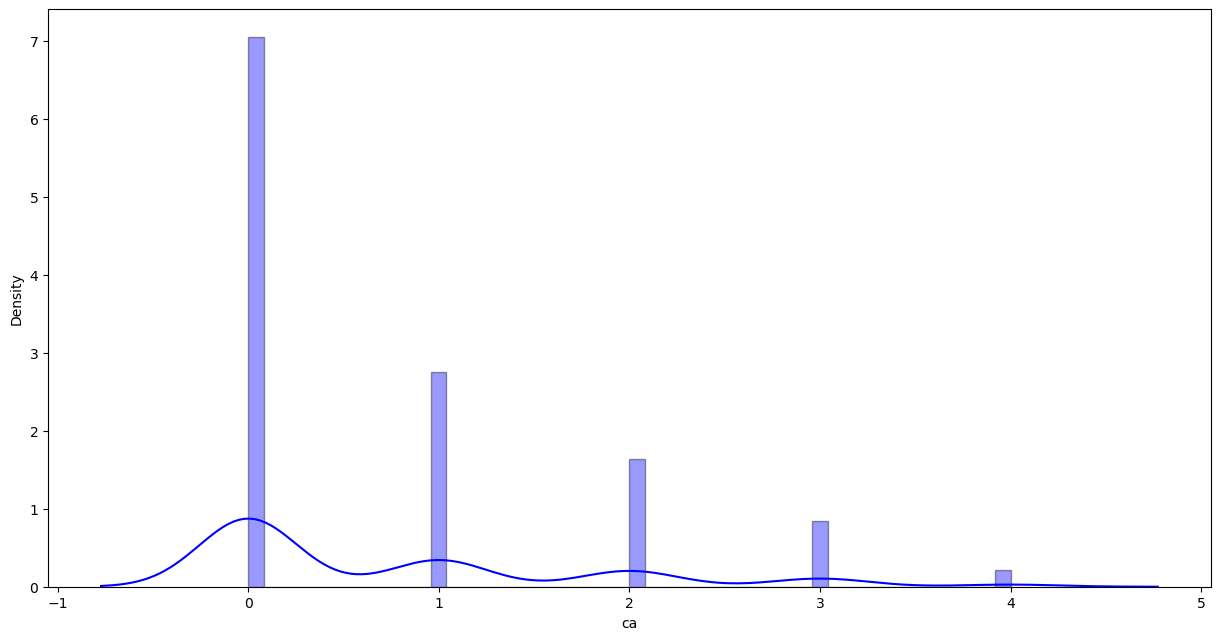

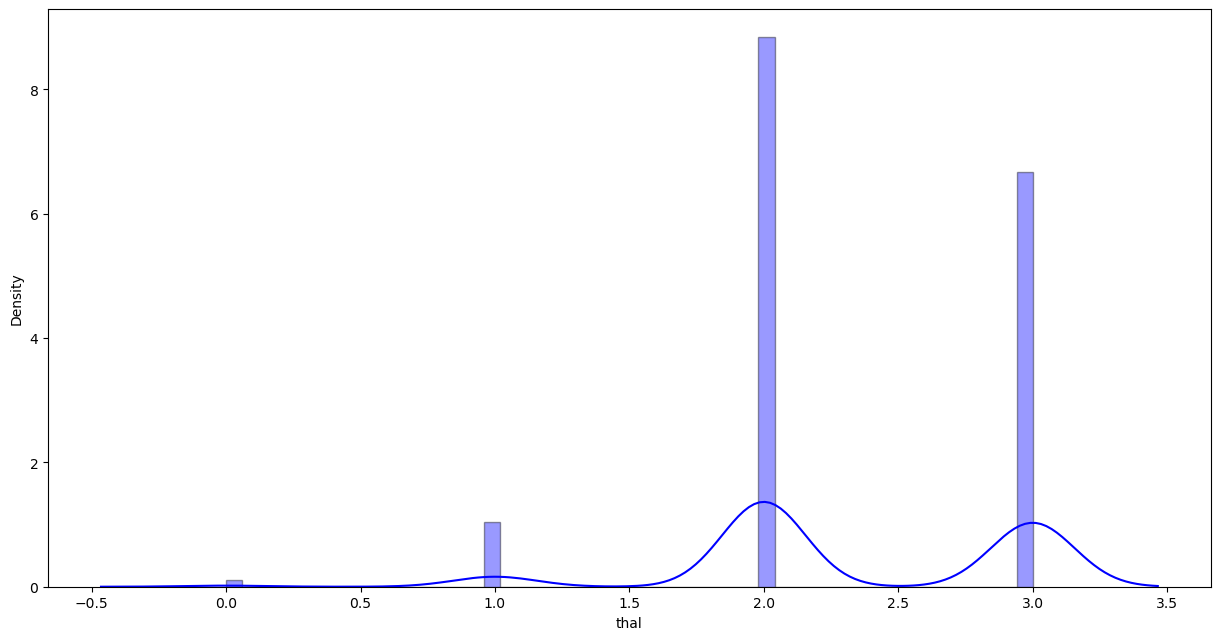

In [53]:
mean_features=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]

for i in mean_features:
    plt.figure(figsize=(15,7.5))
    sns.distplot(data[i], hist=True, kde=True, bins =50, color='blue', hist_kws={'edgecolor':'black'})
    

#### Histogram plot of features

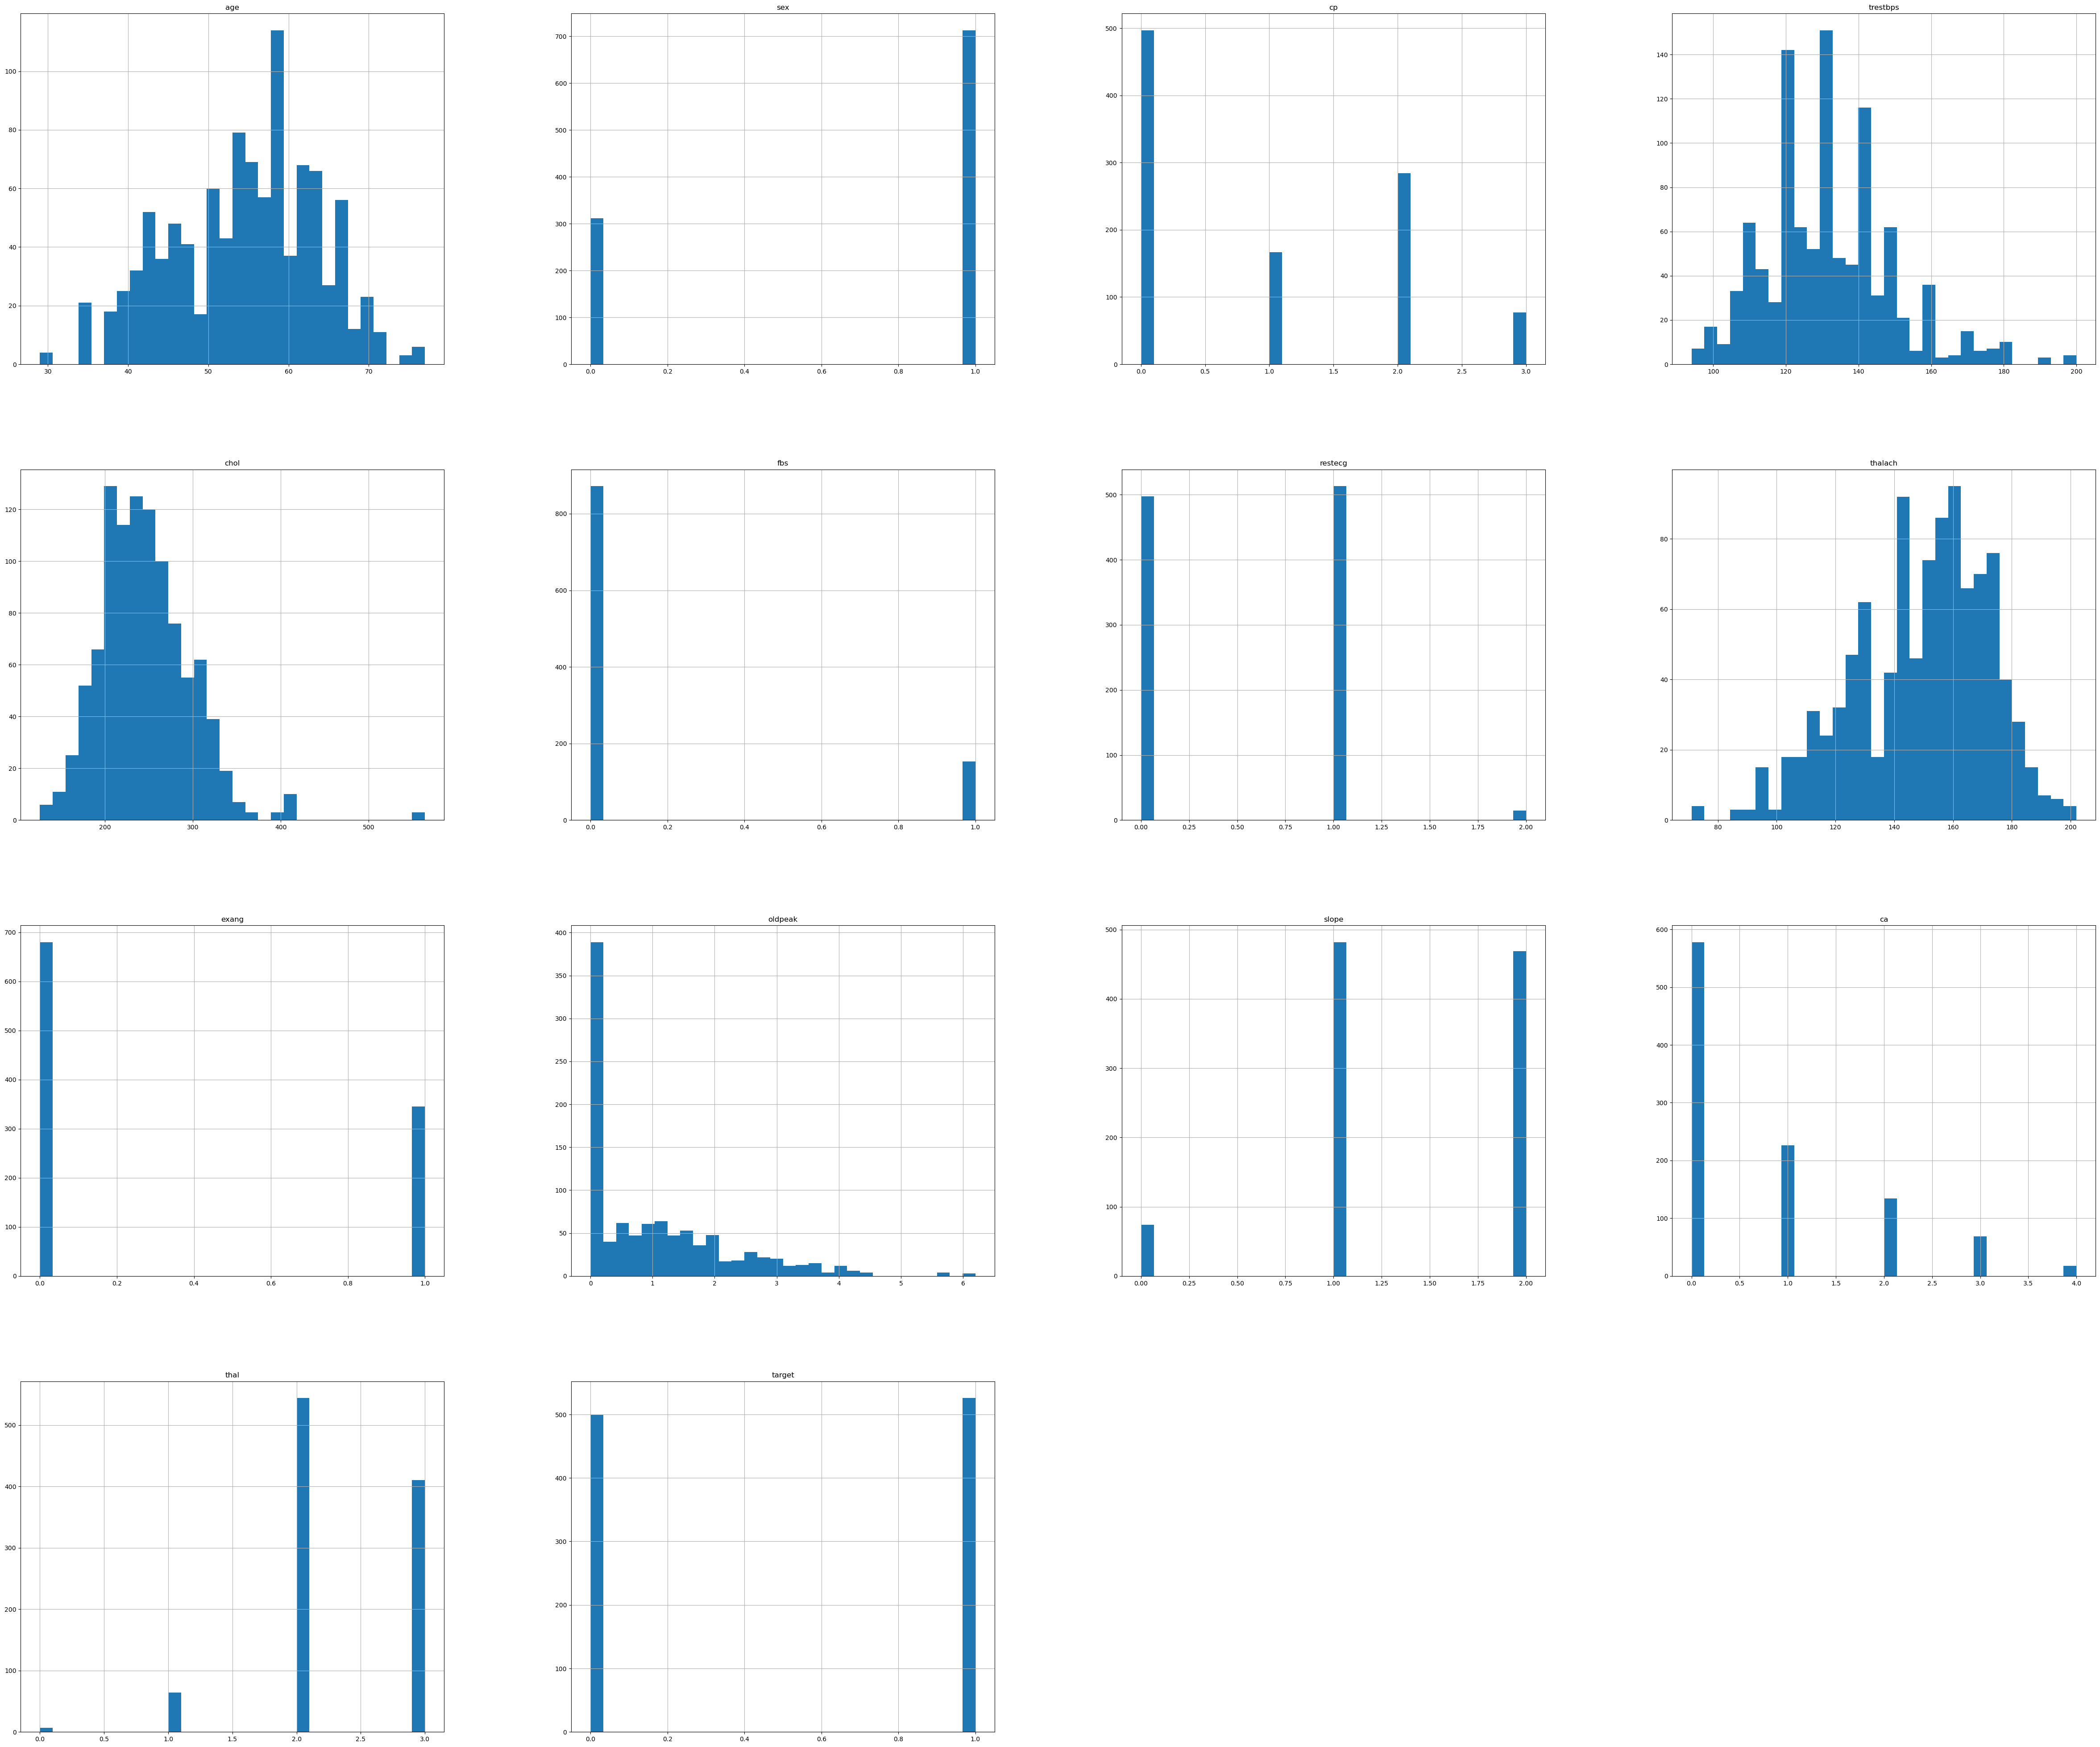

In [54]:
data.hist(bins=30, figsize=(60,50))

plt.show()

In [55]:
new_data=data.drop('target',axis=1)

new_data=new_data.astype(float)

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   float64
 1   sex       1025 non-null   float64
 2   cp        1025 non-null   float64
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   float64
 6   restecg   1025 non-null   float64
 7   thalach   1025 non-null   float64
 8   exang     1025 non-null   float64
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   float64
 11  ca        1025 non-null   float64
 12  thal      1025 non-null   float64
dtypes: float64(13)
memory usage: 104.2 KB


#### Correalation Heatmap

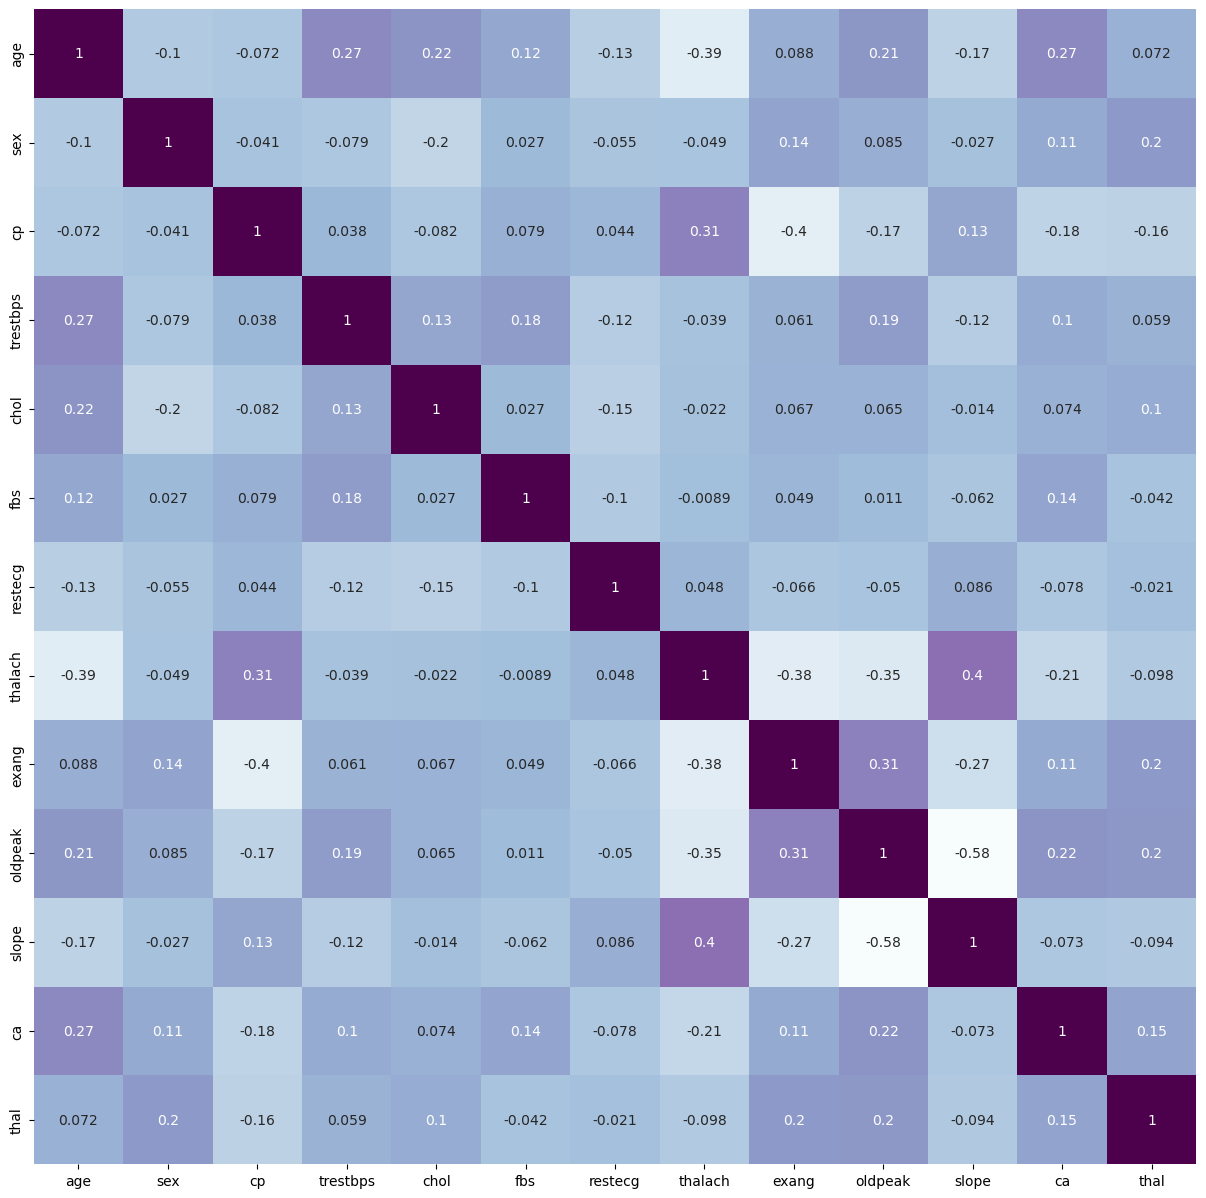

In [56]:
correlation=new_data.corr()

plt.figure(figsize=(15,15))

sns.heatmap(correlation, annot=True, cmap='BuPu', cbar=False)

plt.show()

### Data Scaling

In [57]:
scaler = MinMaxScaler()

columns=new_data.columns

scaled_data = pd.DataFrame(scaler.fit_transform(new_data))

scaled_data.columns=columns

scaled_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
5,0.604167,0.0,0.0,0.056604,0.278539,0.0,0.0,0.389313,0.0,0.161290,0.5,0.00,0.666667
6,0.604167,1.0,0.0,0.188679,0.438356,0.0,1.0,0.526718,0.0,0.709677,0.0,0.75,0.333333
7,0.541667,1.0,0.0,0.622642,0.372146,0.0,0.0,0.564885,1.0,0.129032,0.5,0.25,1.000000
8,0.354167,1.0,0.0,0.245283,0.280822,0.0,0.0,0.557252,0.0,0.129032,1.0,0.00,1.000000
9,0.520833,1.0,0.0,0.264151,0.365297,0.0,0.0,0.343511,1.0,0.516129,0.5,0.50,0.666667


In [58]:
X=scaled_data
Y=data['target']
Y=Y.astype(float)

In [59]:
print(X)

           age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0     0.479167  1.0  0.000000  0.292453  0.196347  0.0      0.5  0.740458   
1     0.500000  1.0  0.000000  0.433962  0.175799  1.0      0.0  0.641221   
2     0.854167  1.0  0.000000  0.481132  0.109589  0.0      0.5  0.412214   
3     0.666667  1.0  0.000000  0.509434  0.175799  0.0      0.5  0.687023   
4     0.687500  0.0  0.000000  0.415094  0.383562  1.0      0.5  0.267176   
...        ...  ...       ...       ...       ...  ...      ...       ...   
1020  0.625000  1.0  0.333333  0.433962  0.216895  0.0      0.5  0.709924   
1021  0.645833  1.0  0.000000  0.292453  0.301370  0.0      0.0  0.534351   
1022  0.375000  1.0  0.000000  0.150943  0.340183  0.0      0.0  0.358779   
1023  0.437500  0.0  0.000000  0.150943  0.292237  0.0      0.0  0.671756   
1024  0.520833  1.0  0.000000  0.245283  0.141553  0.0      0.5  0.320611   

      exang   oldpeak  slope    ca      thal  
0       0.0  0.161290    1.0

In [60]:
print(Y)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1020    1.0
1021    0.0
1022    0.0
1023    1.0
1024    0.0
Name: target, Length: 1025, dtype: float64


## Data Splitting

In [61]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [62]:
print(X.shape, x_train.shape, x_test.shape)

(1025, 13) (820, 13) (205, 13)


In [63]:
print(Y.shape, y_train.shape, y_test.shape)

(1025,) (820,) (205,)


## Classification

### Model 1 | Logestic Regression

In [64]:
LR=LogisticRegression()

LR.fit(x_train,y_train)

LogisticRegression()

Accuracy of train data: 0.8414634146341463
Accuracy of test data: 0.8341463414634146


<Axes: >

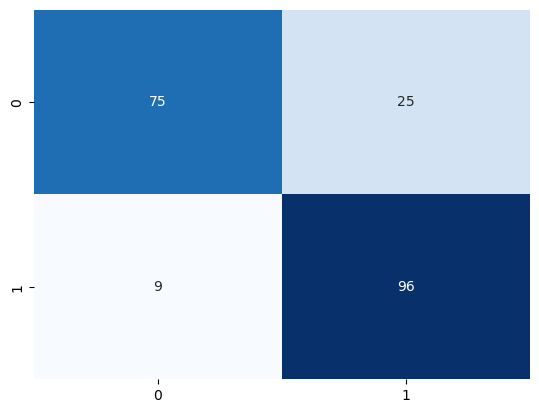

In [65]:
y_pred_lr=LR.predict(x_test)

CM_lr=confusion_matrix(y_test, y_pred_lr)

lr_train_accuracy=accuracy_score(y_train,LR.predict(x_train))
lr_test_accuracy=accuracy_score(y_test,y_pred_lr)

print('Accuracy of train data:',lr_train_accuracy)
print('Accuracy of test data:',lr_test_accuracy)

sns.heatmap(CM_lr,annot=True, fmt='d', cmap='Blues', cbar=False,)

### Model 2 | KNearestNeighbors (KNN) 

In [66]:
knn=KNeighborsClassifier()

knn.fit(x_train,y_train)

KNeighborsClassifier()

Accuracy of train data: 0.9573170731707317
Accuracy of test data: 0.8536585365853658


<Axes: >

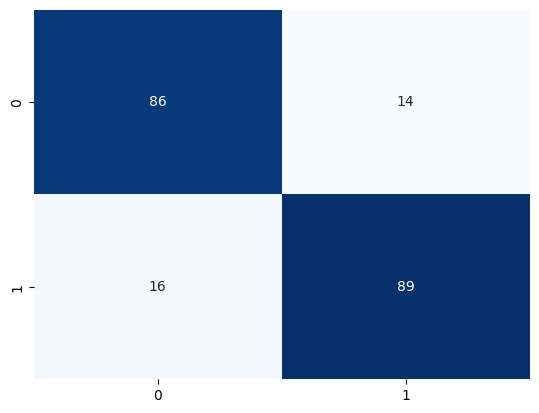

In [67]:
y_pred_knn=knn.predict(x_test)

cm_knn=confusion_matrix(y_test,y_pred_knn)

knn_train_accuracy=accuracy_score(y_train,knn.predict(x_train))
knn_test_accuracy=accuracy_score(y_test,y_pred_knn)

print('Accuracy of train data:',knn_train_accuracy)
print('Accuracy of test data:',knn_test_accuracy)

sns.heatmap(cm_knn,annot=True, fmt='d', cmap='Blues', cbar=False,)

### Model 3 | Decision Tree

In [68]:
dtc=DecisionTreeClassifier()

dtc.fit(x_train,y_train)

DecisionTreeClassifier()

Accuracy of train data: 1.0
Accuracy of test data: 0.9853658536585366


<Axes: >

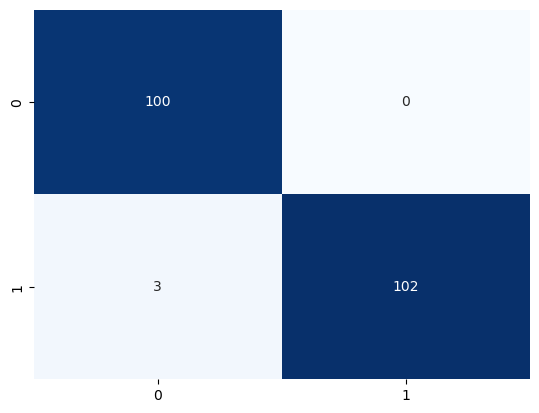

In [69]:
y_pred_dtc=dtc.predict(x_test)

cm_dtc=confusion_matrix(y_test,y_pred_dtc)

dtc_train_accuracy=accuracy_score(y_train,dtc.predict(x_train))
dtc_test_accuracy=accuracy_score(y_test,y_pred_dtc)

print('Accuracy of train data:',dtc_train_accuracy)
print('Accuracy of test data:',dtc_test_accuracy)

sns.heatmap(cm_dtc,annot=True, fmt='d', cmap='Blues', cbar=False,)

### Model 4 | Random Forest

In [70]:
rf=RandomForestClassifier()

rf.fit(x_train,y_train)

RandomForestClassifier()

Accuracy of train data: 1.0
Accuracy of test data: 1.0


<Axes: >

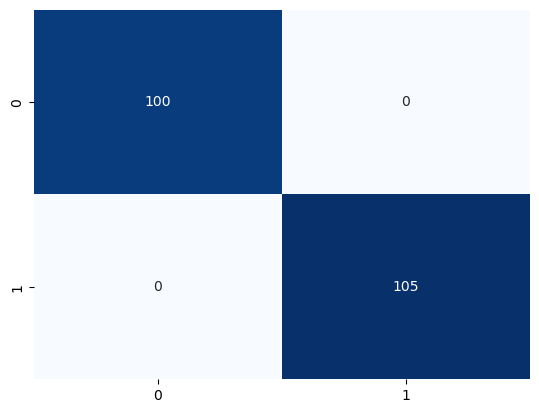

In [71]:
y_pred_rf=rf.predict(x_test)

cm_rf=confusion_matrix(y_test,y_pred_rf)

rf_train_accuracy=accuracy_score(y_train,rf.predict(x_train))
rf_test_accuracy=accuracy_score(y_test,y_pred_rf)

print('Accuracy of train data:',rf_train_accuracy)
print('Accuracy of test data:',rf_test_accuracy)

sns.heatmap(cm_rf,annot=True, fmt='d', cmap='Blues', cbar=False,)

### Model 5 | XGBoost

In [72]:
xgb=XGBClassifier()

xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy of train data: 1.0
Accuracy of test data: 1.0


<Axes: >

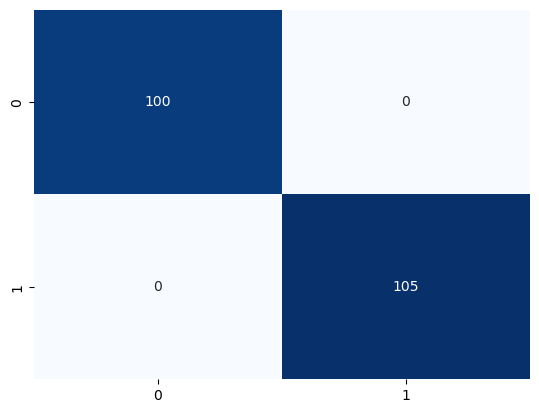

In [73]:
y_pred_xgb=xgb.predict(x_test)

cm_xgb=confusion_matrix(y_test,y_pred_xgb)

xgb_train_accuracy=accuracy_score(y_train,xgb.predict(x_train))
xgb_test_accuracy=accuracy_score(y_test,y_pred_xgb)

print('Accuracy of train data:',xgb_train_accuracy)
print('Accuracy of test data:',xgb_test_accuracy)

sns.heatmap(cm_xgb,annot=True, fmt='d', cmap='Blues', cbar=False,)

## Final Comparision

<Axes: title={'center': 'XGBoost'}>

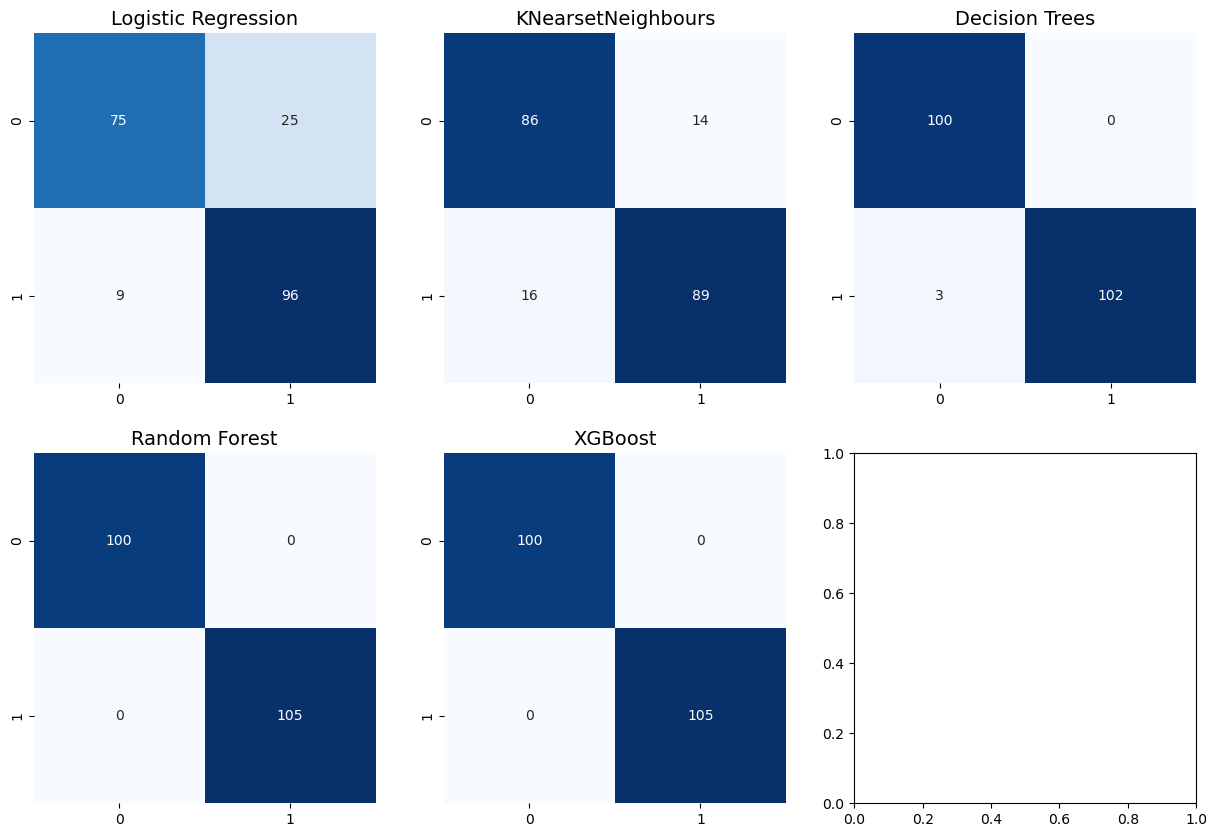

In [89]:
figure, axes = plt.subplots(2,3, figsize=(15,10))

axes[0,0].set_title('Logistic Regression', fontsize=14)
sns.heatmap(CM_lr,annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0,0])

axes[0,1].set_title('KNearsetNeighbours', fontsize=14)
sns.heatmap(cm_knn,annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0,1])

axes[0,2].set_title('Decision Trees', fontsize=14)
sns.heatmap(cm_dtc,annot=True, fmt='d', cmap='Blues', cbar=False,ax=axes[0,2])

axes[1,0].set_title('Random Forest', fontsize=14)
sns.heatmap(cm_rf,annot=True, fmt='d', cmap='Blues', cbar=False,ax=axes[1,0])

axes[1,1].set_title('XGBoost', fontsize=14)
sns.heatmap(cm_xgb,annot=True, fmt='d', cmap='Blues', cbar=False,ax=axes[1,1])
